In [2]:
import pandas as pd

#Nettoyage textuelle
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

In [3]:
anti = pd.read_csv ('../../TweetDataset_AntiBrexit.csv')

In [4]:
pro = pd.read_csv ('../../TweetDataset_ProBrexit.csv')

In [11]:
anti

,Unnamed: 0,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,0,09-Jan-2022 11:58PM,NaN,https://twitter.com/nickynicky77551/statuses/1...,NaN,"RT @cnapan: #JohnsonOut is now running at 218,...",Twitter,@nickynicky77551,Unknown,NaN,...,nicky@nicky7755,https://twitter.com/nickynicky77551,"Ardent Remainer; Rejoiner now, Support NHS 💙 #...",1697.0,2576.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
1,1,09-Jan-2022 11:58PM,NaN,https://twitter.com/lines12345/statuses/148032...,NaN,RT @Femi_Sorry: My point: Any Labour leader wh...,Twitter,@lines12345,Unknown,NaN,...,Helen,https://twitter.com/lines12345,Tory hating Remainer,11.0,92.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
2,2,09-Jan-2022 11:58PM,NaN,https://twitter.com/millymoo97/statuses/148032...,NaN,RT @andy_murray: QT @Nigel_Farage: Please reco...,Twitter,@millymoo97,Unknown,NaN,...,seonaid mcgill,https://twitter.com/millymoo97,"Scottish, European, anti-Brexit, pro-EU, freel...",2129.0,3880.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
3,3,09-Jan-2022 11:58PM,NaN,https://twitter.com/ValueSurplus/statuses/1480...,NaN,RT @mikegalsworthy: We’re the first country in...,Twitter,@valuesurplus,United Kingdom,NaN,...,Rightwing politics is a social virus #BLM 🇵🇸🌈,https://twitter.com/ValueSurplus,Classical Cultural Marxist.\nAnti Brexit estab...,2420.0,4952.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
4,4,09-Jan-2022 11:57PM,NaN,https://twitter.com/Jackcdawes/statuses/148032...,NaN,"RT @StevePeers: QT @andy_murray: Game, set and...",Twitter,@jackcdawes,United Kingdom,NaN,...,Jack Dawes #FBPEGlobal #JohnsonOut #RejoinEU,https://twitter.com/Jackcdawes,"Lover of crime & horror fiction, history, & Me...",18304.0,19889.0,"Jan 9, 2022",11:57 PM,England,London,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210569,7814,27-Mar-2022 12:04AM,NaN,http://twitter.com/LauraPh27961838/statuses/15...,NaN,RT @PrfChrisPainter: Johnson delayed and dithe...,Twitter,@LauraPh27961838,Unknown,NaN,...,Laura Phelan,http://www.twitter.com/LauraPh27961838,Languages Literature Europe Remainer.🕷Pic of 6...,6011.0,6178.0,"Mar 27, 2022",12:04 AM,NaN,NaN,NaN
210570,7815,27-Mar-2022 12:04AM,NaN,http://twitter.com/carolinep0/statuses/1507871...,NaN,"RT @j_b_kennedy: Bizarrely because of #Brexit,...",Twitter,@carolinep0,United Kingdom,NaN,...,Caroline P. 🇪🇺🔶 💙 What is today's fresh hell?,http://www.twitter.com/carolinep0,🇪🇺 #FBPE #FBPPR Remainer for ever. Engaged cit...,2753.0,2337.0,"Mar 27, 2022",12:04 AM,England,Milton Keynes,NaN
210571,7816,27-Mar-2022 12:03AM,NaN,https://twitter.com/carolinep0/statuses/150787...,NaN,RT @Sillyshib: Brexit was supposed to split th...,Twitter,@carolinep0,United Kingdom,NaN,...,Caroline P. 🇪🇺🔶 💙 What is today's fresh hell?,https://twitter.com/carolinep0,🇪🇺 #FBPE #FBPPR Remainer for ever. Engaged cit...,2753.0,2337.0,"Mar 27, 2022",12:03 AM,England,Milton Keynes,NaN
210572,7817,27-Mar-2022 12:01AM,NaN,http://twitter.com/PeteGardner18/statuses/1507...,NaN,@mitsyarty #Brexit going well in terms of UK i...,Twitter,@PeteGardner18,United Kingdom,NaN,...,Pete Gardner,http://www.twitter.com/PeteGardner18,"#FBPE #FBPPR Centrist Fantasist, #Remainer, an...",1380.0,2298.0,"Mar 27, 2022",12:01 AM,England,London,NaN


In [5]:
anti2 = anti['Hit Sentence']
pro2 = pro['Hit Sentence']


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Nettoyage des tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'RT : ', '', tweet)
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)
    tweet = tweet.lower()
    return tweet

# Lemmatiser les tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Fonction principale de prétraitement des tweets
def preprocess_tweet(tweet):
    cleaned_tweet = clean_tweet(tweet)
    tokens = word_tokenize(cleaned_tweet)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mbrei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbrei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mbrei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
pro_clean=[]
    
for tweet in pro2:
    tweet_clean = preprocess_tweet(tweet)
    pro_clean.append(tweet_clean)


In [37]:
anti_clean=[]
    
for tweet in anti2:
    tweet_clean = preprocess_tweet(tweet)
    anti_clean.append(tweet_clean)

In [9]:
pro_clean

['qt value brexit tory mp back constituency weekend contact contemplate put letter would take minute email detail easily found lay front medium please act backboris',
 'michael fabricant absolutely right dangerous expose obvious people msm particularly bbc hell bent getting shot boris removed u precious eu place revenge propaganda uk',
 'find rich tory voter assume unionist conservative oblivious part united kingdom betrayed johnson leadership boasting brexit done done eu legitimacy northern ireland http co khrwbrlqhb',
 'brexit britain win london named best city young business http co sipixunnvv excellent brexit uk future',
 'johnson taken tory likelihood imposed pm remainer brexiteers leave drove weaken tory party realistic credible brexiteer replace weaken brexiteer ambition',
 'probably politician capable making brexit success press want take unfortunately lot people stupid enough believe journalist tell',
 'brexit whole sorry medium circus',
 'important party still subject someone

In [38]:
antibrexit = pd.DataFrame({'tweet': anti_clean, 'avis': 'AntiBrexit'})
probrexit = pd.DataFrame({'tweet': pro_clean, 'avis': 'ProBrexit'})
brexit_data = pd.concat([antibrexit, probrexit], axis=0)


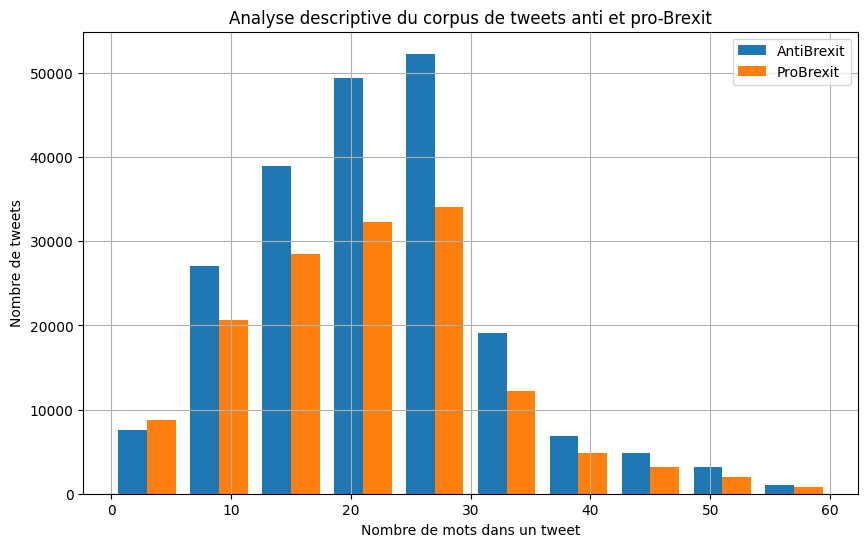

In [39]:
import matplotlib.pyplot as plt
brexit_data['nombre_mots'] = brexit_data['tweet'].apply(lambda x: len(x.split()))

# Créer un histogramme
plt.figure(figsize=(10, 6))

plt.hist([brexit_data[brexit_data['avis'] == 'AntiBrexit']['nombre_mots'], brexit_data[brexit_data['avis'] == 'ProBrexit']['nombre_mots']], bins=10, range=(0, 60), label=['AntiBrexit', 'ProBrexit'])
plt.xlabel('Nombre de mots dans un tweet')
plt.ylabel('Nombre de tweets')
plt.title('Analyse descriptive du corpus de tweets anti et pro-Brexit')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# POur le modèle 
from sklearn.model_selection import train_test_split  #Séparation du jdd
from sklearn.feature_extraction.text import TfidfVectorizer # Vectoriser X
from sklearn.svm import SVC # Modèle de SVM
from sklearn.metrics import accuracy_score  # calcul accuraccy
from sklearn.preprocessing import LabelEncoder # Encoder Y
import joblib #Exporter le modèle

In [41]:
X = brexit_data['tweet']
y = brexit_data['avis']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(label_encoder.classes_,y)

['AntiBrexit' 'ProBrexit'] [0 0 0 ... 1 1 1]


In [42]:
vectorizer = TfidfVectorizer(max_features=150)
X_vectorized = vectorizer.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.9, random_state=42)

# On utilise un svm
classifier = SVC(kernel='linear')

classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = classifier.predict(X_train)
accuracy_score(y_train, y_pred)

0.7016192071468453

In [38]:
X_test

<206684x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2611333 stored elements in Compressed Sparse Row format>

In [45]:
joblib.dump(classifier, 'avis_tweet_predict_150.pkl')


['avis_tweet_predict_150.pkl']